In [ ]:
#import sys
#sys.path.insert(0, '/data')

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
countrydf_raw = pd.read_csv('Data Sets for Visualization/countries of the world.csv', decimal=",")

In [27]:
countrydf_raw.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [28]:
countrydf = countrydf_raw.iloc[:,:10].dropna()

In [29]:
countrydf = countrydf[countrydf['Pop. Density (per sq. mi.)'] < 5000]

countrydf.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
dtype: object

In [30]:
#countrydf['Pop. Density (per sq. mi.)'] = countrydf['Pop. Density (per sq. mi.)'].str.replace(',','.')
#countrydf['Pop. Density (per sq. mi.)'] = countrydf['Pop. Density (per sq. mi.)'].apply(float)

In [31]:
countrydf[["Country",'Pop. Density (per sq. mi.)']].sort_values(ascending = False, by ='Pop. Density (per sq. mi.)').head()

,Country,Pop. Density (per sq. mi.)
129,Malta,1266.5
22,Bermuda,1241.0
127,Maldives,1196.7
15,Bahrain,1050.5
16,Bangladesh,1023.4


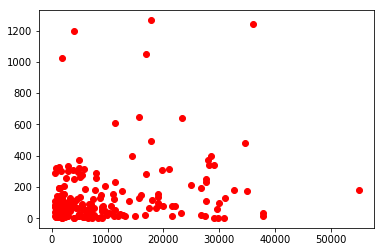

In [32]:
plt.scatter(
    x=countrydf['GDP ($ per capita)'],
    y=countrydf['Pop. Density (per sq. mi.)'],
    color='red')
plt.show()

Text(0.5, 1.0, 'Country Literacy vs. Infant Mortality')

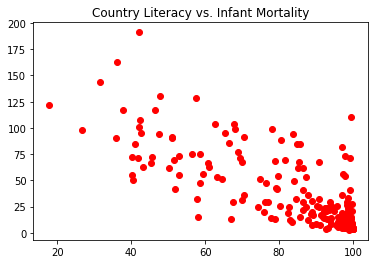

In [33]:
plt.scatter(
    x=countrydf['Literacy (%)'],
    y=countrydf['Infant mortality (per 1000 births)'],
    color='red')
plt.title('Country Literacy vs. Infant Mortality')

In [34]:
admisdf = pd.read_csv('Data Sets for Visualization/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [35]:
suicidedf = pd.read_csv('Data Sets for Visualization/suiciderates.csv')
suicidedf['country'] = suicidedf['country-year'].str.replace('\d+', '')

In [36]:
suicidedf.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [37]:
year_suicidedf = suicidedf.groupby('year')['suicides_no', 'population'].sum()
year_suicidedf['global rate (suicides per 100000)'] = year_suicidedf['suicides_no'] / year_suicidedf['population'] *100000

Text(0, 0.5, 'Suicides per 100000 People')

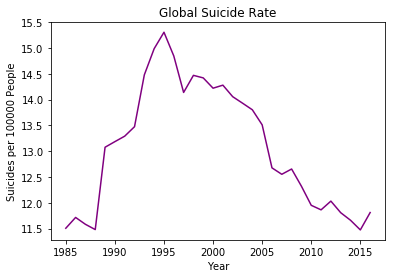

In [38]:
plt.plot(year_suicidedf['global rate (suicides per 100000)'], color='purple')
plt.title('Global Suicide Rate')
plt.xlabel('Year')
plt.ylabel('Suicides per 100000 People')

The graph above depicts the global suicide rate over time. Beginning in the late 80's the global suicide rate began a rapid increase until 1995 where it began to steadily decrease until 2015. This graphs raises the questions of why the global suicide rates inclined and declined so steadily.

In [39]:
suicidedf["country-year"].unique()

array(['Albania1987', 'Albania1988', 'Albania1989', ..., 'Uzbekistan2012',
       'Uzbekistan2013', 'Uzbekistan2014'], dtype=object)

In [40]:
year_counts_suicidedf = suicidedf.groupby("year")["year"].size()
year_counts_suicidedf

year
1985     576
1986     576
1987     648
1988     588
1989     624
1990     768
1991     768
1992     780
1993     780
1994     816
1995     936
1996     924
1997     924
1998     948
1999     996
2000    1032
2001    1056
2002    1032
2003    1032
2004    1008
2005    1008
2006    1020
2007    1032
2008    1020
2009    1068
2010    1056
2011    1032
2012     972
2013     960
2014     936
2015     744
2016     160
Name: year, dtype: int64

2009 is the year with the data from the most countries. Using only 2009 data, we maximize how many countries that will contribute the our Suicide Rate vs. GDPpc 

In [41]:
suicides_2009 = suicidedf.loc[lambda df: suicidedf["year"] == 2009, :]
suicides_2009

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
240,Albania,2009,female,15-24 years,0,270003,0.00,Albania2009,NaN,"12,044,212,904",4387,Millenials
241,Albania,2009,female,25-34 years,0,182712,0.00,Albania2009,NaN,"12,044,212,904",4387,Generation X
242,Albania,2009,female,35-54 years,0,394286,0.00,Albania2009,NaN,"12,044,212,904",4387,Boomers
243,Albania,2009,female,5-14 years,0,236174,0.00,Albania2009,NaN,"12,044,212,904",4387,Generation Z
244,Albania,2009,female,55-74 years,0,233302,0.00,Albania2009,NaN,"12,044,212,904",4387,Silent
245,Albania,2009,female,75+ years,0,61582,0.00,Albania2009,NaN,"12,044,212,904",4387,Silent
246,Albania,2009,male,15-24 years,0,283448,0.00,Albania2009,NaN,"12,044,212,904",4387,Millenials
247,Albania,2009,male,25-34 years,0,174955,0.00,Albania2009,NaN,"12,044,212,904",4387,Generation X
248,Albania,2009,male,35-54 years,0,374365,0.00,Albania2009,NaN,"12,044,212,904",4387,Boomers
249,Albania,2009,male,5-14 years,0,253007,0.00,Albania2009,NaN,"12,044,212,904",4387,Generation Z


In [42]:
suic_2009_agg = suicides_2009.groupby('country')['suicides_no', 'population'].sum()

In [43]:
suic_2009_agg['suicide rate (# per 100000)'] = suic_2009_agg['suicides_no'] / suic_2009_agg['population'] * 100000

In [44]:
suic_2009_agg['GDPpc'] = suicides_2009.groupby('country')['gdp_per_capita ($)'].max()

In [45]:
suic_2009_agg.head()

,suicides_no,population,suicide rate (# per 100000),GDPpc
country,,,,
Albania,0,2745735,0.000000,4387
Antigua and Barbuda,0,85405,0.000000,14335
Argentina,2884,37158001,7.761451,8961
Armenia,53,2689695,1.970484,3215
Aruba,4,94795,4.219632,26361


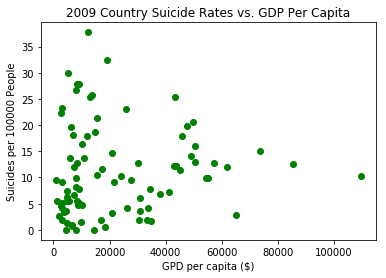

In [46]:
x = suic_2009_agg['GDPpc']
y = suic_2009_agg['suicide rate (# per 100000)']
plt.scatter(x,y,c='green')
plt.xlabel('GPD per capita ($)')
plt.ylabel('Suicides per 100000 People')
plt.title('2009 Country Suicide Rates vs. GDP Per Capita')
plt.show()

This correlation does show very distinct trends in the relationship between GDP per capita and suicide rate for a country for the year of 2009. The triangular shape of the data suggests that there is no correlation.

In [47]:
time_age_suic = suicidedf.groupby(["year","age"])['suicides_no','population'].sum()
time_age_suic['suicides per 100000'] = coun_age_suic['suicides_no'] / coun_age_suic['population'] * 100000
# time_age_suic
# this proved to be too complicated to use because it requires multiindexing to pull out the data which I would need help with

NameError: name 'coun_age_suic' is not defined

In [57]:
small = suicidedf.loc[lambda df: suicidedf['age'] == '5-14 years', :].groupby('year').sum()
teen = suicidedf.loc[lambda df: suicidedf['age'] == '15-24 years', :].groupby('year').sum()
mill = suicidedf.loc[lambda df: suicidedf['age'] == '25-34 years', :].groupby('year').sum()
genx = suicidedf.loc[lambda df: suicidedf['age'] == '35-54 years', :].groupby('year').sum()
boom = suicidedf.loc[lambda df: suicidedf['age'] == '55-74 years', :].groupby('year').sum()
elde = suicidedf.loc[lambda df: suicidedf['age'] == '75+ years', :].groupby('year').sum()

small['suicides per 100000'] = small['suicides_no'] / small['population'] * 100000
teen['suicides per 100000'] = teen['suicides_no'] / teen['population'] * 100000
mill['suicides per 100000'] = mill['suicides_no'] / mill['population'] * 100000
genx['suicides per 100000'] = genx['suicides_no'] / genx['population'] * 100000
boom['suicides per 100000'] = boom['suicides_no'] / boom['population'] * 100000
elde['suicides per 100000'] = elde['suicides_no'] / elde['population'] * 100000

In [55]:
#AgeDict = {'small':"5-14 years",'teen':'15-24 years','mill':"25-34 years",'genx':"35-54 years",'boom':"55-74 years",'elde':"75+ years"}

#for key, value in AgeDict.items():
#    key = suicidedf[suicidedf['age'] == value].groupby('year').sum()
#    key['suicides per 100000'] = key['suicides_no'] / key['population'] * 100000

NameError: name 'teen' is not defined

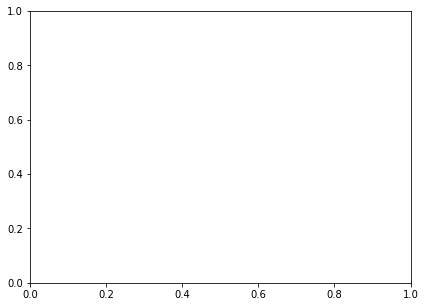

In [56]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
# plt.plot(small['suicides per 100000'])
plt.plot(teen['suicides per 100000'], color='purple', label="15-24")
plt.plot(mill['suicides per 100000'], color='green', label="25-34")
plt.plot(genx['suicides per 100000'], color='red', label="35-54")
plt.plot(boom['suicides per 100000'], color='yellow', label="55-74")
plt.plot(elde['suicides per 100000'], color='orange', label="75+")
plt.ylabel('suicides per 100000')
plt.xlabel('year')
plt.title("Suicides Rates Over time by Age")
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(small['suicides per 100000'])
plt.ylabel("suicide per 100000")
plt.xlabel('year')
plt.title("Suicide Rates Over Time for 5-14 Year Olds")

The two graphs above show that suicide rates increase with increasing age group. But on the whole, suicides rates are decreasing across all age groups around the world, with the exception of 5-14 year olds. While the 5-14 year old suicide rate is quite low compared to other age demographics, it continues to remain volatile.

In [51]:
suicidedf['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [52]:
gigen = suicidedf[suicidedf['generation'] == 'G.I. Generation'].groupby('year').sum()
silen = suicidedf[suicidedf['generation'] == 'Silent'].groupby('year').sum()
boomr = suicidedf[suicidedf['generation'] == 'Boomers'].groupby('year').sum()
genex = suicidedf[suicidedf['generation'] == 'Generation X'].groupby('year').sum()
millen = suicidedf[suicidedf['generation'] == 'Millenials'].groupby('year').sum()
genez = suicidedf[suicidedf['generation'] == 'Generation Z'].groupby('year').sum()

gigen['suicides per 100000'] = gigen['suicides_no'] / gigen['population'] * 100000
silen['suicides per 100000'] = silen['suicides_no'] / silen['population'] * 100000
boomr['suicides per 100000'] = boomr['suicides_no'] / boomr['population'] * 100000
genex['suicides per 100000'] = genex['suicides_no'] / genex['population'] * 100000
millen['suicides per 100000'] = millen['suicides_no'] / millen['population'] * 100000
genez['suicides per 100000'] = genez['suicides_no'] / genez['population'] * 100000

Text(0.5, 1.0, 'Suicides Rates Over time by Generation')

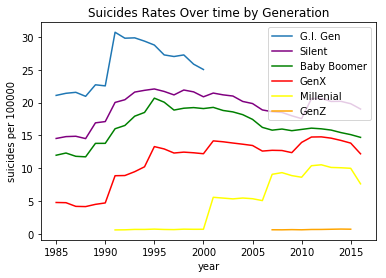

In [53]:
plt.plot(gigen['suicides per 100000'], label="G.I. Gen")
plt.plot(silen['suicides per 100000'], color='purple', label = 'Silent')
plt.plot(boomr['suicides per 100000'], color='green', label = 'Baby Boomer')
plt.plot(genex['suicides per 100000'], color='red', label = 'GenX')
plt.plot(millen['suicides per 100000'], color='yellow', label = 'Millenial')
plt.plot(genez['suicides per 100000'], color='orange', label = 'GenZ')
plt.ylabel("suicides per 100000")
plt.xlabel('year')
plt.legend(loc='upper right')
plt.title("Suicides Rates Over time by Generation")

Suicides rates of a generation rise over time and steadily decrease as members of that generation experiences natural death as result of aging; as the generation dies, the number of people dying naturally outpaces and perhaps eliminates those were susceptible to suicide. The suicide rate of the Silent Generation and Baby Boomers peaked during the same year, with a slight uptick in the suicide rate of Silent Generation members in 2010.